In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import beta

---
The Beta Distribution
=====
***

In [2]:
a = 5
b = 10
my_beta = beta(a, b)
mean, var, skew, kurt = my_beta.stats(moments='mvsk')
print "mean: %s \nvar: %s \nskew: %s \nkurt: %s \n" % (mean, var, skew, kurt)

mean: 0.333333333333 
var: 0.0138888888889 
skew: 0.332756132323 
kurt: -0.176470588235 



In [3]:
# generate random numbers from the distribution
random_values = my_beta.rvs(size=100)
print random_values

[ 0.11673616  0.53120406  0.25188204  0.27836888  0.36989493  0.24058716
  0.42109872  0.19590336  0.51408008  0.23627985  0.59602116  0.30499492
  0.31505499  0.14117347  0.29353348  0.22160884  0.17479421  0.29226077
  0.48098768  0.27880421  0.11361846  0.45209769  0.21422608  0.29698437
  0.29989587  0.17215679  0.18826637  0.40243194  0.18451293  0.28957161
  0.32791036  0.30610564  0.31951764  0.5827992   0.36676195  0.30056618
  0.28741526  0.1998077   0.3136466   0.37273467  0.25930007  0.1620449
  0.21963539  0.25657355  0.46752813  0.45869841  0.38925383  0.20729695
  0.19017347  0.35834388  0.34470197  0.45879479  0.30918143  0.32858883
  0.21762293  0.51567411  0.46041754  0.64999973  0.17203116  0.43491256
  0.40245634  0.33074301  0.54717427  0.56923996  0.30194759  0.30073995
  0.37448873  0.23632122  0.52648504  0.49238255  0.46405313  0.28165117
  0.18563426  0.24110857  0.20094431  0.39438109  0.24000653  0.31177346
  0.11009981  0.13126752  0.39898701  0.22315453  0.

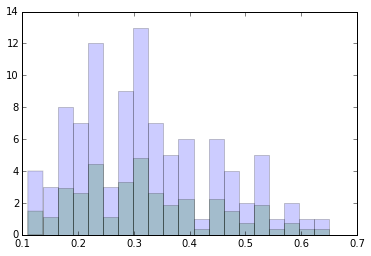

In [4]:
# what does the histogram look like for these random values?
fig, ax = plt.subplots(1, 1)

h = ax.hist(random_values, normed=False, bins=20, alpha=0.2)
h2 = ax.hist(random_values, normed=True, bins=20, alpha=0.2)

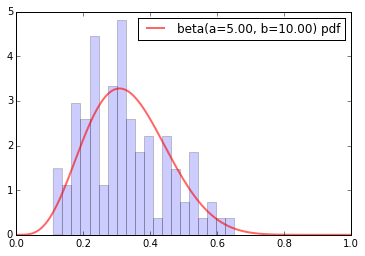

In [5]:
# what does the pdf plot look like?
fig, ax = plt.subplots(1, 1)

xs = np.linspace(0, 1, 200)
p = ax.plot(xs, my_beta.pdf(xs), 'r-', lw=2, alpha=0.6, label='beta(a=%0.2f, b=%0.2f) pdf'%(a,b))
h = ax.hist(random_values, normed=True, bins=20, alpha=0.2)
ax.legend()

---
[A Bayesian view of Amazon Resellers](http://www.johndcook.com/blog/2011/09/27/bayesian-amazon/)
=====
***

Three Amazon resellers offer a book at essentially the same price. Here are their ratings:

- 94% positive out of 85,193 reviews
- 98% positive out of 20,785 reviews
- 99% positive out of 840 reviews

Which reseller is likely to give the best service?

#### A simpler example:

- Reseller A has 90 positive reviews out of 100 (90% positive)
- Reseller B has two reviews, both positive. (100% positive)

Which is better?  (better = more trustworthy)

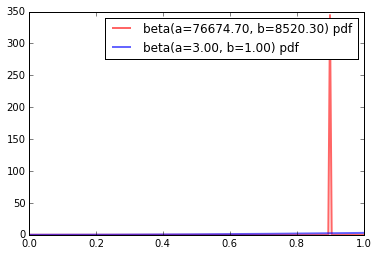

In [6]:
# Plot Beta Distribution of Beta(1,1) (the Prior)
# Plot Beta(1,1)
# Plot Beta(91,11)
# Plot Beta(3,1)
# what does pdf plot look like?
fig, ax = plt.subplots(1, 1)

fig.figsize=(10,5)
xs = np.linspace(0, 1, 200)

resellerA_a = (0.9 * 85193) + 1
resellerA_b = (0.1 * 85193) + 1
resellerB_a = (1.0 * 2) + 1
resellerB_b = 1
pA = ax.plot(xs, beta.pdf(xs, resellerA_a, resellerA_b), 'r-', lw=2, alpha=0.6, 
             label='beta(a=%0.2f, b=%0.2f) pdf'%(resellerA_a, resellerA_b))
pB = ax.plot(xs, beta.pdf(xs, resellerB_a, resellerB_b), 'b-', lw=2, alpha=0.6, 
             label='beta(a=%0.2f, b=%0.2f) pdf'%(resellerB_a, resellerB_b))

ax.legend()

In [7]:
ras = beta.rvs(90, 11, size=2)
print ras
mean = beta(90,11).stats(moments='m')
print mean
mean = beta(3,1).stats(moments='m')
print mean

[ 0.89954997  0.88483257]
0.891089108911
0.75


###Percent_Better is really comparing 2 posterior probabiliy distributions!
###Another way of doing the comparison is to simply calculate the mean of the posterior distribution

In [8]:
# What is the probability that a sample from resellerA is bigger than a sample from resellerB?
# We answer this with random sampling!
def percent_better(resellerA_a, resellerA_b, resellerB_a, resellerB_b, size):
    ra = beta.rvs(resellerA_a, resellerA_b, size=size)
    rb = beta.rvs(resellerB_a, resellerB_b, size=size)
    #This is just a count of the number of times ra exceeds rb
    return sum(ra >= rb) / float(size)

In [9]:
percent_better(resellerA_a, resellerA_b, resellerB_a, resellerB_b, size=100000)

0.72682000000000002

In [10]:
percent_better(resellerB_a, resellerB_b, resellerA_a, resellerA_b, size=100000)

0.27406000000000003

## Back to the original Question
Three Amazon resellers offer a book at essentially the same price. Here are their ratings:
    
- Reseller A: 94% positive out of 85,193 reviews
- Reseller B: 98% positive out of 20,785 reviews
- Reseller C: 99% positive out of 840 reviews

Which reseller is likely to give the best service?

####All that is happening here is that we are calculating a posterior using the reseller stats and a prior of a Beta distribution with parameters 1,1

In [11]:
def simp(t1):
    #get the number of successes or positive reviews
    a1=(94. * t1 / 100.)
    
    #get the number of failures or negative reviews
    a2 = (t1 - a1)
    
    #add the prior
    a1 += 1
    a2 += 1
    
    print a1
    print a2
    return [a1, a2]

In [12]:
a1, a2 = simp(85193)
print a1, a2

80082.42
5112.58
80082.42 5112.58


In [13]:
b1, b2 = simp(20785)
print b1, b2

19538.9
1248.1
19538.9 1248.1


In [14]:
c1, c2 = simp(840)
print c1, c2

790.6
51.4
790.6 51.4


###Based on the percent_better function a is the best, followed by b, followed by c
###Comparison of the distribution means confirms this order

In [15]:
percent_better(a1, a2, b1, b2, size=100000)

0.50468000000000002

In [16]:
percent_better(a1, a2, c1, c2, size=100000)

0.53529000000000004

In [17]:
percent_better(b1, b2, c1, c2, size=100000)

0.53224000000000005

In [18]:
mean, var = beta(a1,a2).stats(moments='mv')
print "mean of a is", mean
print "var of a is %0.10f"% (var)
mean, var = beta(b1,b2).stats(moments='mv')
print "mean of b is", mean
print "var of b %0.10f"% (var)
mean, var = beta(c1,c2).stats(moments='mv')
print "mean of c is",mean
print "var of c %0.10f"% (var)

mean of a is 0.939989670755
var of a is 0.0000006621
mean of b is 0.939957665849
var of b 0.0000027149
mean of c is 0.938954869359
var of c 0.0000679936


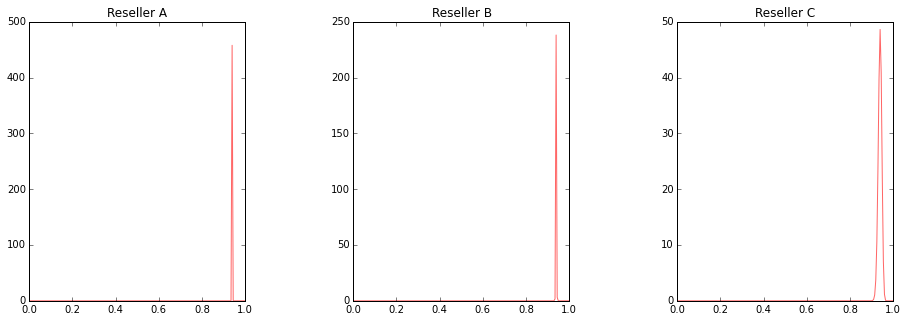

In [19]:
fig1 = plt.figure(1, figsize=(12,5))
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)

plt.subplots_adjust(left=0.00, right=1, wspace=0.5, hspace=0.5)
x = np.linspace(0, 1, 200)

ax1.plot(x, beta.pdf(x, a1, a2),'r-', lw=1, alpha=0.6, label='beta pdf')
ax1.set_title("Reseller A")

ax2.plot(x, beta.pdf(x, b1, b2),'r-', lw=1, alpha=0.6, label='beta pdf')
ax2.set_title("Reseller B")

ax3.plot(x, beta.pdf(x, c1, c2),'r-', lw=1, alpha=0.6, label='beta pdf')
ax3.set_title("Reseller C")